## About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## Target 

The company wants to know:

    Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
    How well those variables describe the electric cycle demands

## About Dataset 


Column Profiling:

    datetime: datetime
    season: season (1: spring, 2: summer, 3: fall, 4: winter)
    holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
    weather:
        1: Clear, Few clouds, partly cloudy, partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp: temperature in Celsius
    atemp: feeling temperature in Celsius
    humidity: humidity
    windspeed: wind speed
    casual: count of casual users
    registered: count of registered users
    count: count of total rental bikes including both casual and registered

In [245]:
## Libraries
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, norm, f_oneway, chi2_contingency, levene, kruskal
#import 

In [246]:
df = pd.read_csv('bike_sharing.csv')
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [247]:
print(f'The Dataset has {df.shape[0]} Records and {df.shape[1]} Columns')

The Dataset has 10886 Records and 12 Columns


### Data Type

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [249]:
# Number of Null Datapoints in each Column
df.isna().sum(axis = 0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### There are no null Values throughout the Dataset

### Statistical Summary

In [66]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## Datetime

In [217]:
df['datetime'] = pd.to_datetime(df['datetime'])
max_date = df['datetime'].max().date()
min_date = df['datetime'].min().date()
print(f'The Data set ranges from {max_date} to {min_date}')

The Data set ranges from 2012-12-19 to 2011-01-01


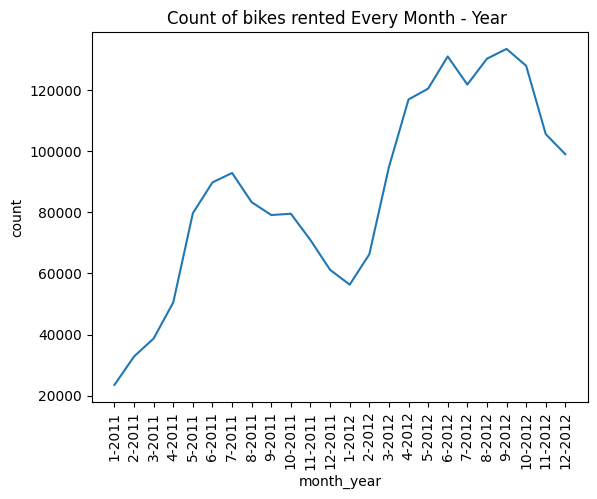

In [218]:
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

d = df.groupby(['year', 'month']).sum()['count'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)

sns.lineplot(x = d['month_year'], y = d['count'] )
plt.xticks(rotation = 90)
plt.title('Count of bikes rented Every Month - Year ')
plt.show()

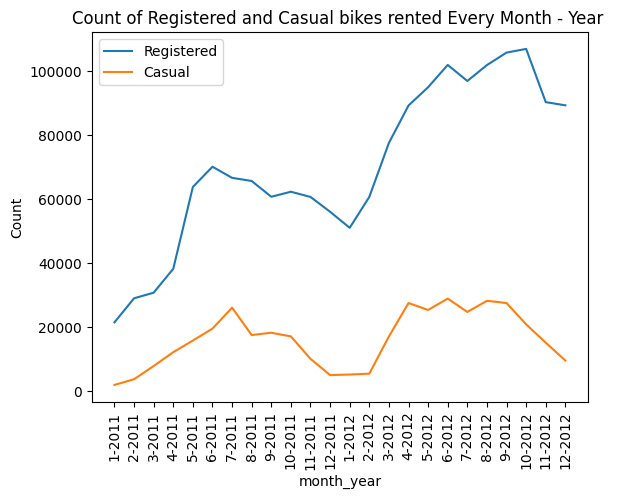

In [69]:
d = df.groupby(['year', 'month']).sum()['registered'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)
sns.lineplot(x = d['month_year'], y = d['registered'], label = 'Registered')

d = df.groupby(['year', 'month']).sum()['casual'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)
sns.lineplot(x = d['month_year'], y = d['casual'], label = 'Casual')

plt.xticks(rotation = 90)
plt.title('Count of Registered and Casual bikes rented Every Month - Year ')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Insights - 

* Over the time period it can be seen that the count of Bikes rented Increaed and Decreased Twice.

* The count of Casual Registered bikes is increasing where as the count of Casual bikes has almost remained the in the same range

### Temperature 

In [70]:
mi = df['temp'].min()
ma = df['temp'].max()
print(f'Maximum Temperature = {ma} and Minimum Temperature = {mi}')

Maximum Temperature = 41.0 and Minimum Temperature = 0.82


In [71]:
# Converting the Continous variable into Categorical

df['temp_cat'] = pd.cut(df['temp'], bins = [0, 10, 20, 30, 40, 45] )

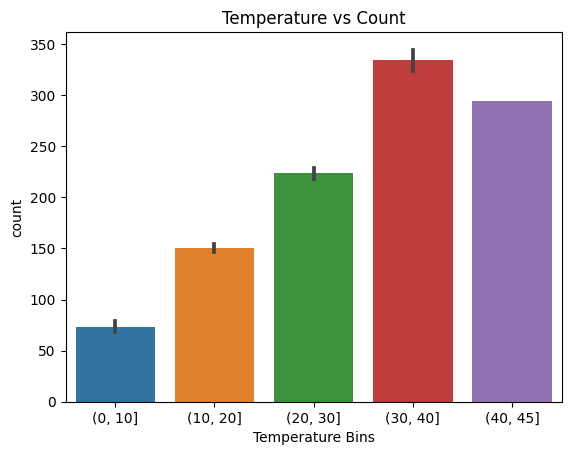

In [72]:
sns.barplot(data = df, x = 'temp_cat', y = 'count')
plt.title('Temperature vs Count')
plt.xlabel('Temperature Bins')
plt.show()

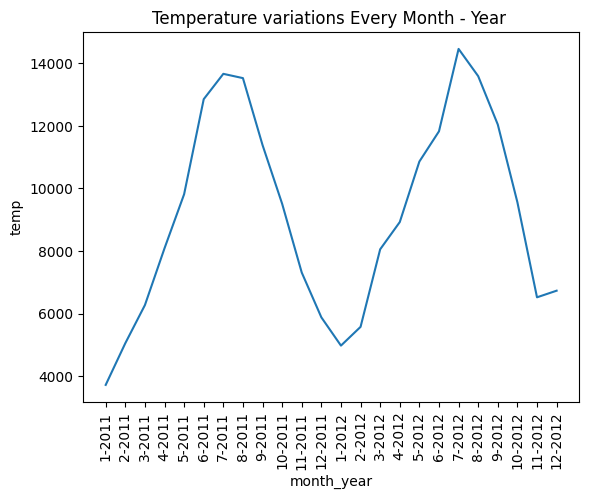

In [73]:
d = df.groupby(['year', 'month']).sum()['temp'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)

sns.lineplot(x = d['month_year'], y = d['temp'] )
plt.xticks(rotation = 90)
plt.title('Temperature variations Every Month - Year ')
plt.show()

#### Insights
* The average number of bikes rented was least on days when Temperature was in the range of (0-10]. 
* The average number of bikes rented was maximum on days when Temperature was in range (30-40].
* The Temperature went the all time low in the month of January 2012

## aTemperature (feeling Temperature)

In [74]:
mi = df['atemp'].min()
ma = df['atemp'].max()
print(f'Maximum Temperature = {ma} and Minimum Temperature = {mi}')

Maximum Temperature = 45.455 and Minimum Temperature = 0.76


In [75]:
# Converting the Continous variable into Categorical

df['atemp_cat'] = pd.cut(df['atemp'], bins = [0, 10, 20, 30, 40, 50] )

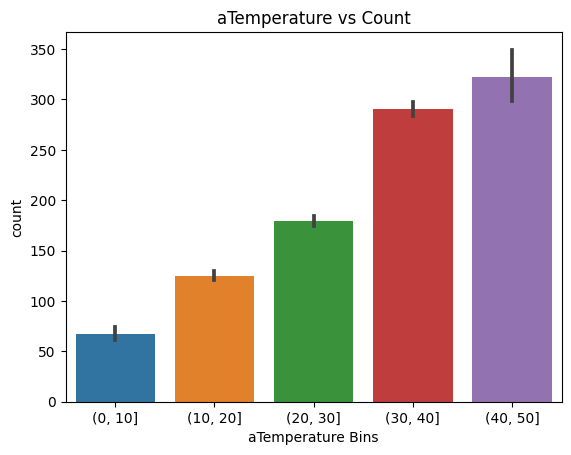

In [76]:
sns.barplot(data = df, x = 'atemp_cat', y = 'count')
plt.title('aTemperature vs Count')
plt.xlabel('aTemperature Bins')
plt.show()

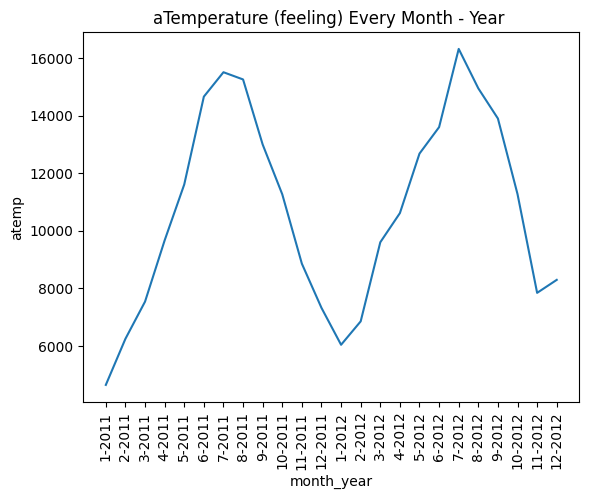

In [77]:
d = df.groupby(['year', 'month']).sum()['atemp'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)

sns.lineplot(x = d['month_year'], y = d['atemp'] )
plt.xticks(rotation = 90)
plt.title('aTemperature (feeling) Every Month - Year ')
plt.show()

#### Insights
* The average number of bikes rented was least on days when Temperature was in the range of (0-10]. 

* The average number of bikes rented was maximum on days when Temperature was in range (40-50].

In [88]:
def outlier(data):
    '''
    Function to Identify Outliers                                                                                                                            
    '''
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    upper_limit = np.percentile(data, 75) + iqr*1.5 
    lower_limit = np.percentile(data, 25) - iqr*1.5 
    return data[(data<lower_limit) | (data>upper_limit)]

## WorkingDay

In [96]:
workingday_count = df[df['workingday']==1]['count'].values

non_Workingday_count = df[df['workingday']==0]['count'].values

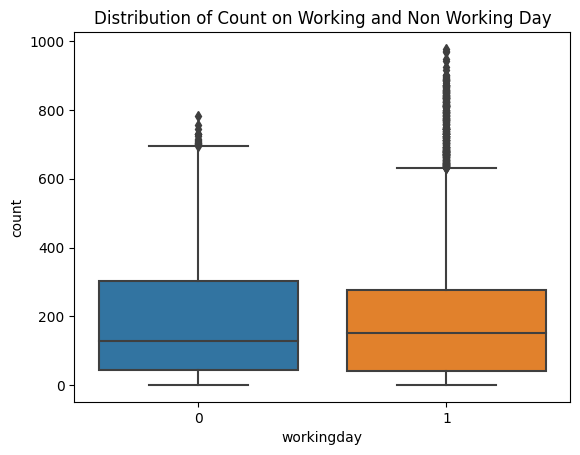

In [117]:
sns.boxplot(data = df, y = 'count', x = 'workingday')
plt.title('Distribution of Count on Working and Non Working Day')
plt.show()

#### Identifying the possible Outliers

In [229]:
x = outlier(workingday_count)
print(f'The Number of possible outliers in Count of Bikes rented on working day = {len(x)}')

y = outlier(non_Workingday_count)
print(f'The Number of possible outliers in Count of Bikes on Non working day = {len(y)}')

The Number of possible outliers in Count of Bikes rented on working day = 278
The Number of possible outliers in Count of Bikes on Non working day = 16


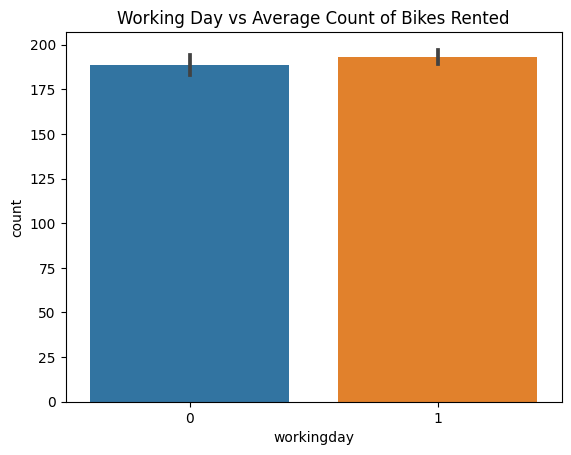

In [116]:
sns.barplot(data = df, x = 'workingday', y = 'count', estimator = np.mean)
plt.title('Working Day vs Average Count of Bikes Rented')
plt.show()

#### Hypothesis Testing

##### Ho - The count of Bikes rented on Working and Non Working Day is same.

##### Ha - The count of Bikes rented on Working and Non Working Day not is same.

###### To check the above we use Two Tailed Two sample T test.

#### Assumptions of Student's T Test - 
* The Data follows normal Distribution
* The Data is sampled Independently and Randomly.
* Homogenity of Variance - the two populations compared should have the same variance.

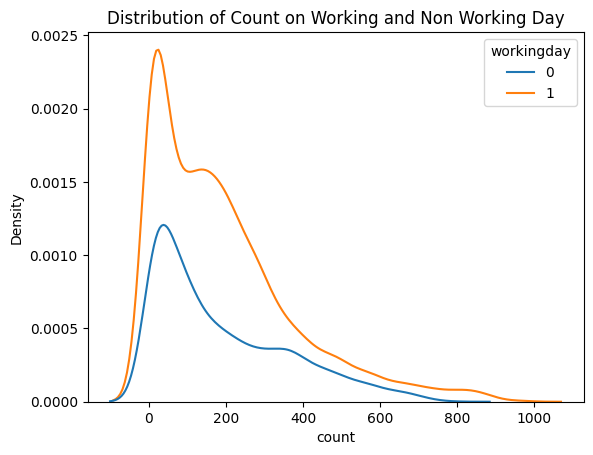

In [109]:
sns.kdeplot(data = df, x = 'count', hue = 'workingday')
plt.title('Distribution of Count on Working and Non Working Day')
plt.show()

#### Testing Homogenity of Variance

In [55]:
levene(workingday_count, non_Workingday_count)

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

#### * Since the pValue is greater than 0.05, we can say that the variance of both the samples is not statistically different.
#### * From the above Plot, its clear that the data is not Normaly distributed. So we will use Permutation Resampling Technique (with sample size = 100).

In [110]:
ttest_ind(workingday_count, non_Workingday_count, permutations = 100)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.25)

#### Conclusion - Since the P Value is gretaer than Significance level = 0.05, we Fail to reject the Null Hypothesis, and conclude that Count of bikes rented on Working day and non Working day is not Statistcally different.

##  Season 

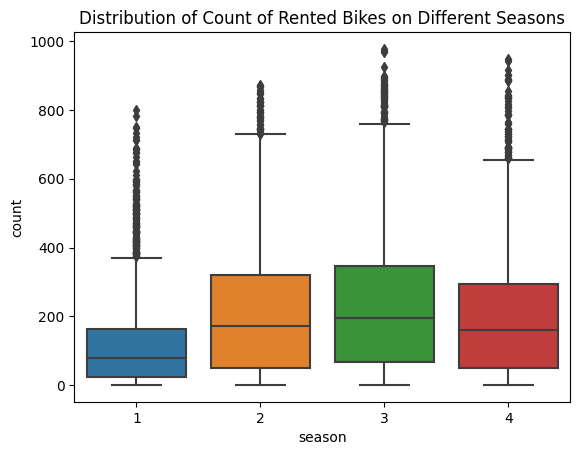

In [135]:
sns.boxplot(data = df, y = 'count', x = 'season')
plt.title('Distribution of Count of Rented Bikes on Different Seasons')
plt.show()

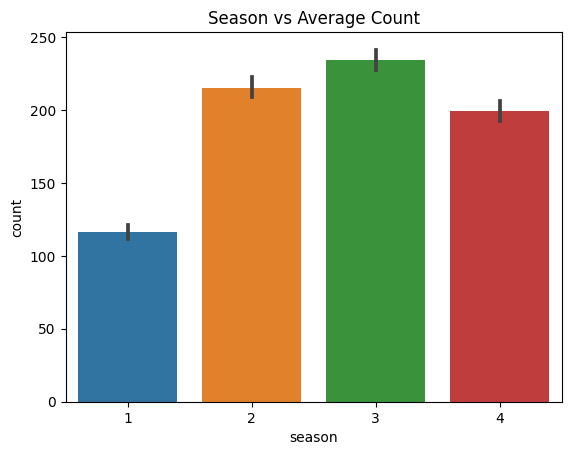

In [136]:
sns.barplot(data = df, x = df['season'], y = df['count'])
plt.title('Season vs Average Count')
plt.show()

### Identifying Outliers

In [230]:
x = outlier(df[df['season']==1]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Season 1 = {len(x)}')

x = outlier(df[df['season']==2]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Season 2 = {len(x)}')

x = outlier(df[df['season']==3]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Season 3 = {len(x)}')

x = outlier(df[df['season']==4]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Season 4 = {len(x)}')

The Number of possible outliers in Count of Bikes rented in Season 1 = 139
The Number of possible outliers in Count of Bikes rented in Season 2 = 42
The Number of possible outliers in Count of Bikes rented in Season 3 = 61
The Number of possible outliers in Count of Bikes rented in Season 4 = 64


#### Hypothesis Testing

##### Ho - The count of Bikes rented in different seasons are Same.

##### Ha - The count of Bikes rented in different seasons are different.


#### Assumptions for ANOVA 
* Populations from which samples are drawn should be normal.
* These sample distribution should have nearly the same variance.
* Samples should be drawn randomly and independently. 


In [139]:
season1_count = df[df['season']==1]['count']
season2_count = df[df['season']==2]['count']
season3_count = df[df['season']==3]['count']
season4_count = df[df['season']==4]['count']

#### Testing for equavalance of Variance

In [160]:
levene(season1_count, season2_count, season3_count, season4_count)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

Since the P Value is very small, the Variance of the Samples is Significantly Different

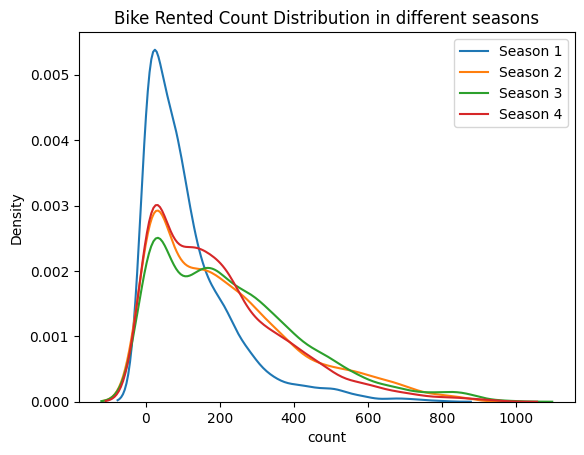

In [138]:
sns.kdeplot(season1_count, label = 'Season 1')
sns.kdeplot(season2_count, label = 'Season 2')
sns.kdeplot(season3_count, label = 'Season 3')
sns.kdeplot(season4_count, label = 'Season 4')
plt.legend()
plt.title('Bike Rented Count Distribution in different seasons')
plt.show()

#### From The above plot, The data does not follow Normal ditributioon.
#### If we assume that the Data Satisfies all the assumptions of ANOVA

In [231]:
f_oneway(season1_count, season2_count, season3_count, season4_count)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

#### Conclusion - Becuase the P value is less than the Significance level (0.05), we reject the null Hypothesis and conclude that Number of bikes rented in different seasons are Statistically Different

#### If we dont make any assumption about Population' s Distribution, we can use Kruskal instead of ANOVA 

In [232]:
kruskal(season1_count, season2_count, season3_count, season4_count)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

Test Statistic = 699.66685, P Value = 2.479008372608633e-151

#### Conclusion - Becuase the P value is less than the Significance level (0.05), we reject the null Hypothesis and conclude that Number of bikes rented in different seasons are Statistically Different

#### Insights from The sample Data
* Maximum Average Count of Bikes rented is During season 3 followed by 2, 1 and 4

##  Weather

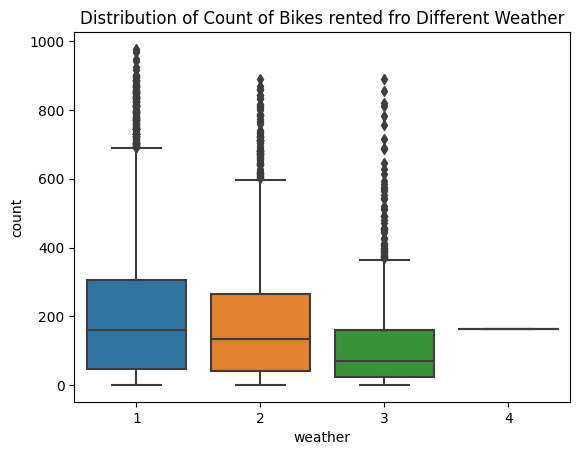

In [150]:
sns.boxplot(data = df, y = 'count', x = 'weather')
plt.title('Distribution of Count of Bikes rented fro Different Weather')
plt.show()

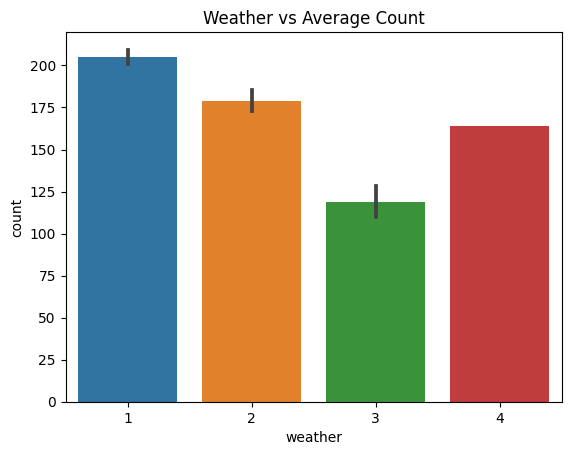

In [151]:
sns.barplot(data = df, x = df['weather'], y = df['count'])
plt.title('Weather vs Average Count')
plt.show()

#### Note - Since We only have single record for weather 4, we will not consider it in the analysis

#### Identifying Outliers

In [233]:
x = outlier(df[df['weather']==1]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Weather 1 = {len(x)}')

x = outlier(df[df['weather']==2]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Weather 2 = {len(x)}')

x = outlier(df[df['weather']==3]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Weather 3 = {len(x)}')

The Number of possible outliers in Count of Bikes rented in Weather 1 = 160
The Number of possible outliers in Count of Bikes rented in Weather 2 = 82
The Number of possible outliers in Count of Bikes rented in Weather 3 = 56


#### Hypothesis Testing

##### Ho - The count of Bikes rented in different Weathers are Same.

##### Ha - The count of Bikes rented in different Weathers are different.


#### Assumptions for ANOVA 
* Populations from which samples are drawn should be normal.
* These sample distribution should have nearly the same variance.
* Samples should be drawn randomly and independently. 


C:\Users\dhira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  """Entry point for launching an IPython kernel.


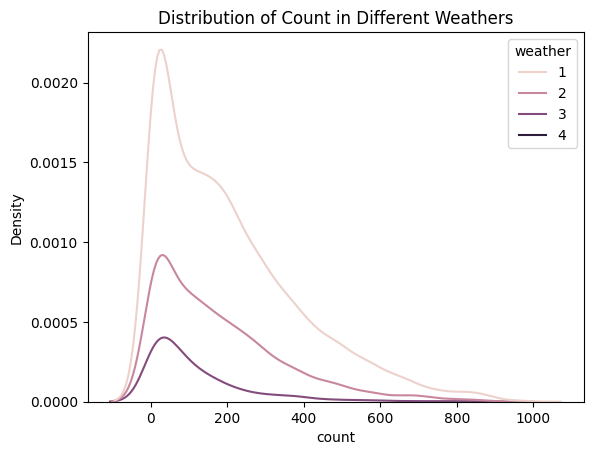

In [154]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')
plt.title('Distribution of Count in Different Weathers')
plt.show()

#### From the above the data does not follow Normal Distribution

In [234]:
weather1_count = df[df['weather']==1]['count']
weather2_count = df[df['weather']==2]['count']
weather3_count = df[df['weather']==3]['count']

#### Testing for equavalance of Variance

In [235]:
levene(weather1_count, weather2_count, weather3_count)

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)

Since the P Value is less than 0.05, we can assume that the Difference of Variance is Statistically Different

#### For this if we assume the Data follows all the assumptions of ANOVA

In [157]:
f_oneway(weather1_count, weather2_count, weather3_count)  

F_onewayResult(statistic=98.28356881946706, pvalue=4.976448509904196e-43)

#### Conclusion - Because the P value is less than the significance level (0.05), we reject the null hypothesis and conclude that  Number of bikes rented in different Weathers are Statistically Different

#### If we dont make any assumption about Population' s Distribution, we can use Kruskal instead of ANOVA 

In [158]:
kruskal(weather1_count, weather2_count, weather3_count)  

KruskalResult(statistic=204.95566833068537, pvalue=3.122066178659941e-45)

#### Conclusion - Because the P value is less than the significance level (0.05), we reject the null hypothesis and conclude that  Number of bikes rented in different Weathers are Statistically Different

#### Insight from Data
From the data we can say that most number of bikes were rented during Weather 1 followed by Weather 2 and 3.

## Weather vs Season

Text(0.5, 1.0, 'Occurance of different Seasons along with different Weather')

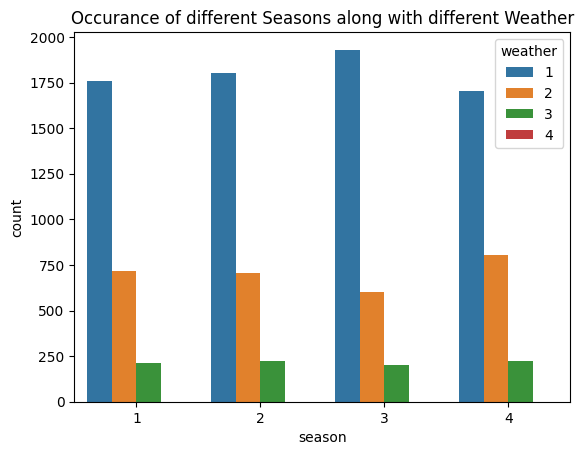

In [196]:
sns.countplot(data = df, x = 'season', hue = 'weather')
plt.title('Occurance of different Seasons along with different Weather')

In [167]:
a = pd.crosstab(df['weather'], df['season'])
a

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


#### Hypothesis Testing

##### Ho - Weather and Climate are Independent.

##### Ha -  Weather and Climate are Dependent.

##### To check this we use  Chi Square Test


#### Assumptions of Chi2 test
* Variables are categorical
* Observations are independent
* Each cell is mutually exclusive
* Expected value in each cell is greater than 5 (at least in 80% of cells)

* The Data Satisfies all the above Assumptions, except for Weather 4. 
* We will exclude Weather 4 for this analysis.

In [240]:
chi2_contingency(a.iloc[:3])

(46.101457310732485,
 2.8260014509929403e-08,
 6,
 array([[1774.04869086, 1805.76352779, 1805.76352779, 1806.42425356],
        [ 699.06201194,  711.55920992,  711.55920992,  711.81956821],
        [ 211.8892972 ,  215.67726229,  215.67726229,  215.75617823]]))

#### Conclusion - Since the P Value is less than the Significance level 0.05, we reject the Null hypothesis and conclude that Weather and Climate have Dependance

## Holiday

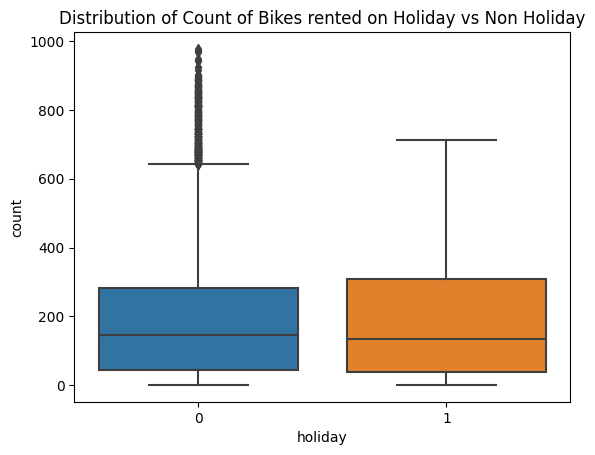

In [241]:
sns.boxplot(data = df, y = 'count', x = 'holiday')
plt.title('Distribution of Count of Bikes rented on Holiday vs Non Holiday')
plt.show()

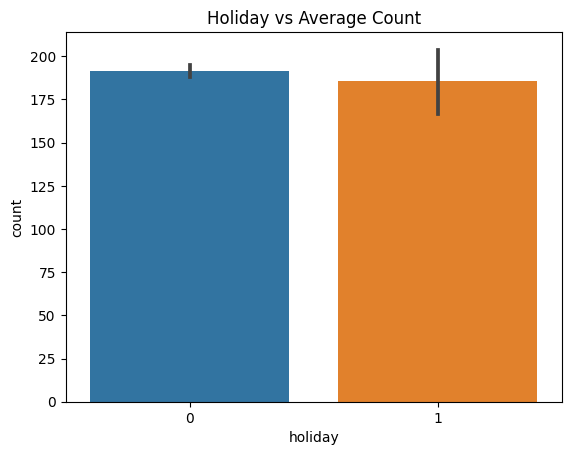

In [242]:
sns.barplot(data = df, x = df['holiday'], y = df['count'])
plt.title('Holiday vs Average Count')
plt.show()

### Identifying Outliers

In [243]:
x = outlier(df[df['holiday']==1]['count'])
print(f'The Number of possible outliers in Count of Bikes rented on Holiday = {len(x)}')

x = outlier(df[df['holiday']==0]['count'])
print(f'The Number of possible outliers in Count of Bikes rented on Non Holiday = {len(x)}')

The Number of possible outliers in Count of Bikes rented on Holiday = 0
The Number of possible outliers in Count of Bikes rented on Non Holiday = 311


#### Hypothesis Testing

##### Ho - The count of Bikes rented on Holiday and Non Holiday is same.

##### Ha - The count of Bikes rented on Holiday and Non Holiday  is not  same.

#### Assumptions of Student's T Test - 
* The Data follows normal Distribution
* The Data is sampled Independently and Randomly.
* Homogenity of Variance - the two populations compared should have the same variance.

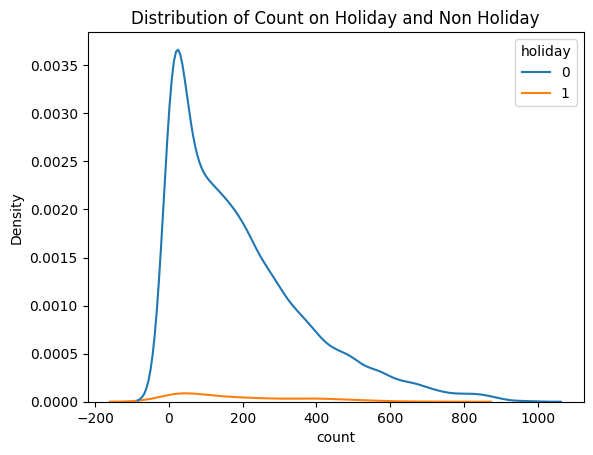

In [183]:
sns.kdeplot(data = df, x = 'count', hue= 'holiday')
plt.title('Distribution of Count on Holiday and Non Holiday')
plt.show()

In [186]:
holiday0_count = df[df['holiday']==0]['count']
holiday1_count = df[df['holiday']==1]['count']

#### Testing Homogenity of Variance

In [244]:
levene(holiday0_count, holiday1_count)

LeveneResult(statistic=1.222306875221986e-06, pvalue=0.9991178954732041)

Because the P Value is greater than 0.05, The difference between the variance is not significant

#### Because the Data is not normal (It can be seen form above plot), we will use Permutation Resampling while using T Test  

In [195]:
ttest_ind(holiday1_count, holiday0_count, permutations = 500)

Ttest_indResult(statistic=-0.5626388963477119, pvalue=0.582)

#### Conclusion - Since the P Value is gretaer than Significance level = 0.05, we Fail to reject the Null Hypothesis, and conclude that Count of bikes rented on Holiday and non Holiday is not Statistcally different.

## Humidity

In [207]:
mi = df['humidity'].min()
ma = df['humidity'].max()
print(f'The Range of humidity Value is {mi} to {ma}')

The Range of humidity Value is 0 to 100


#### Converting Continous to Categorical values

In [212]:
df['humidity_cut'] = pd.cut(df['humidity'], bins = [0, 20, 40, 60, 80, 101])

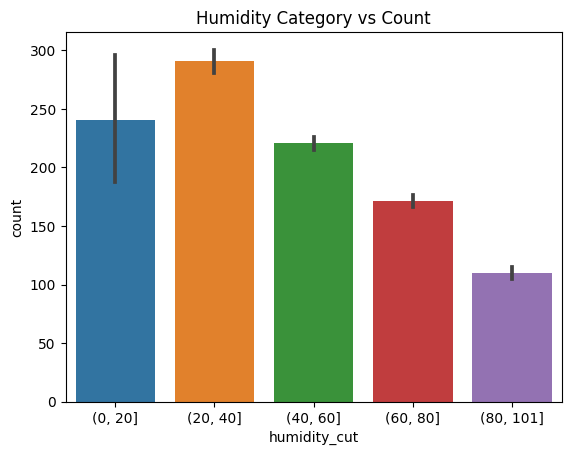

In [215]:
sns.barplot(data = df, x = 'humidity_cut', y = 'count')
plt.title('Humidity Category vs Count')
plt.show()

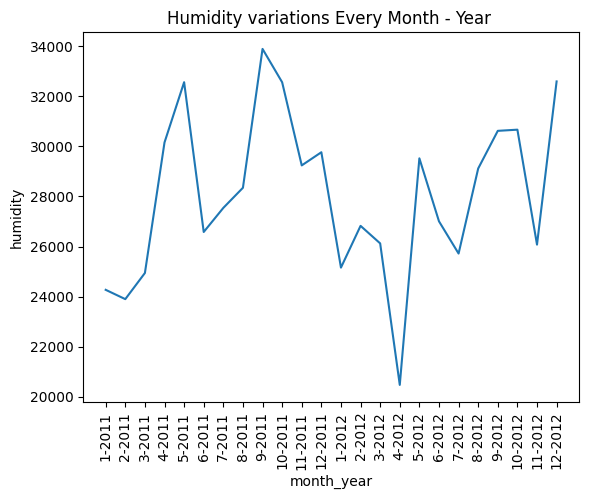

In [220]:
d = df.groupby(['year', 'month']).sum()['humidity'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)

sns.lineplot(x = d['month_year'], y = d['humidity'] )
plt.xticks(rotation = 90)
plt.title('Humidity variations Every Month - Year ')
plt.show()

### Insights from the sample - 
* The average Count of bikes reneted is maximum when Humidity is between (20, 40] followed by (0, 20], (40, 60], (60, 80] and (80, 100]
* The humidity Value took all time low on 4 - 2012

## Windspeed

In [222]:
mi = df['windspeed'].min()
ma = df['windspeed'].max()
print(f'The Range of Windspeed Value is {mi} to {ma}')

The Range of Windspeed Value is 0.0 to 56.9969


#### Converting Continous to Categorical values

In [223]:
df['windspeed_cut'] = pd.cut(df['windspeed'], bins = [0, 20, 40, 60])

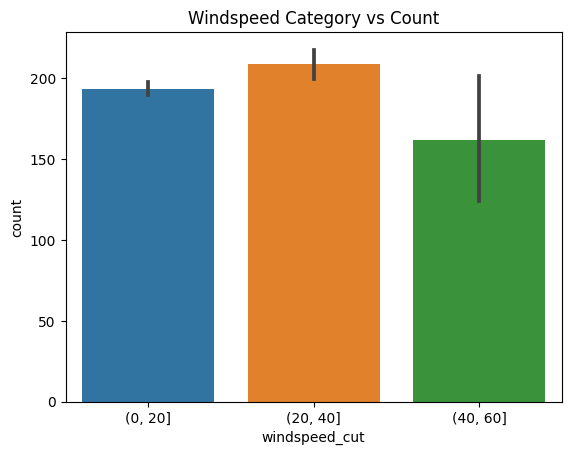

In [227]:
sns.barplot(data = df, x = 'windspeed_cut', y = 'count')
plt.title('Windspeed Category vs Count')
plt.show()

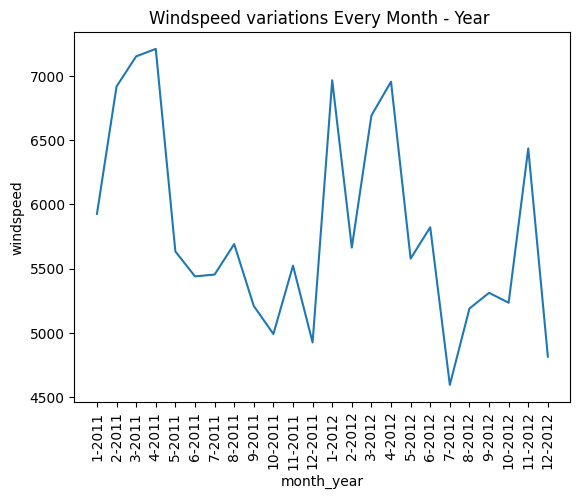

In [228]:
d = df.groupby(['year', 'month']).sum()['windspeed'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)

sns.lineplot(x = d['month_year'], y = d['windspeed'] )
plt.xticks(rotation = 90)
plt.title('Windspeed variations Every Month - Year ')
plt.show()

### Insights from the sample - 
* The average Count of bikes reneted is maximum when Windspeed is between (20, 40] followed by (0, 20] and (40, 60]
* The Windspeed Value took all time low on 7 - 2012